<a href="https://colab.research.google.com/github/StevenWu1/Test/blob/main/Model_Development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy
import matplotlib.pyplot as plt
df_CO2 = pd.read_excel("/content/drive/MyDrive/US_Census.xlsx", sheet_name = "Food Availability (Per Capita) ")

Mounted at /content/drive


/usr/local/lib/python3.8/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


This graph shows that Beef produces the most CO2 per kg out of all other kinds of food and more than doubles the second highest.


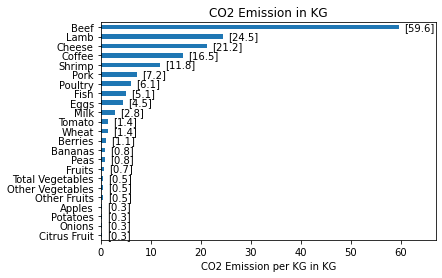

In [2]:
# Bar chart on CO2 footprint by food type
df_Bar = pd.DataFrame()
df_Bar['Year'] = df_CO2['Year'][0:50]
df_Bar_Test = df_CO2['Tab name'].drop_duplicates()

# Shift the dataframe from completely linear to horizontal
for i in range(0, (len(df_Bar_Test)-1) * 50, 50):
    data_added = df_CO2['CO2 Emission per KG'][0:i+50]
    data_added = data_added.shift(periods = (-1 * i))
    df_Bar[df_Bar_Test[i]] = data_added
    df_Bar.fillna(1)

# Fill NaN with number above
df_Bar.fillna(method='ffill', inplace=True)

# Filter out and keep only 2019
df_Bar2019 = df_Bar.loc[df_Bar['Year'] == 2019]
df_Bar2019 = df_Bar2019.drop(['Year'], axis = 1)

# Flip graph and plot Bar graph
df_Bar2019 = df_Bar2019.transpose()
df_Bar2019 = df_Bar2019.sort_values(49, ascending=True)
df_BarShow = df_Bar2019.plot.barh(legend=None)
plt.xlim(0, 67)
plt.xlabel('CO2 Emission per KG in KG')
plt.title('CO2 Emission in KG')

# use plt.text to create labels
df_labels = df_Bar2019.sort_values(49, ascending = False).transpose()
for i in range(0, 23):
  num_label = df_labels[df_labels.columns[i]].to_numpy()
  #num_label = int(num_label)
  plt.text(num_label + 1, 21.7 - i, num_label)

print("This graph shows that Beef produces the most CO2 per kg out of all other kinds of food and more than doubles the second highest.")

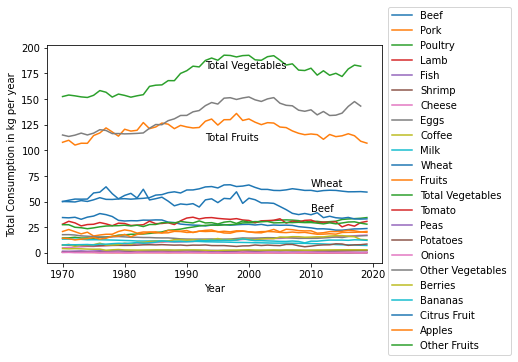

According to the Consumer Weight data published by USDA, the consumpiton of vegetables gradually increased by 19.3 percent from 152.5 kg in 1970 to 182 kg in 2018 over 50 years. At the same time, the consumpiton of beef gradually decreased by 30.6 percent from 34.6 kg in 1970 to 24 kg in 2019.


In [3]:
# Average dietary structure of American
df_CO2['Population'].dropna()
plt.xlabel('Year')
plt.ylabel('Total Consumption in kg per year')
df_label = df_CO2['Tab name'].drop_duplicates()

df_ex = df_CO2
for i in range(0, len(df_CO2['Year']), 1):
  if df_ex['Tab name'][i] == "Dairy Herds":
    df_ex.drop(i, axis = 0, inplace = True)

for i in range(0, (len(df_ex['Year'])), 50):
    plt.plot(df_ex['Year'][i:i+50], df_ex['KG'][i:i+50])
    # plt.plot(df_CO2['Year'][i:i+50], numpy.log(df_CO2['Total CO2 Emission'][i:i+50]))
    plt.legend(df_label, bbox_to_anchor=(1.4, 1.2))
plt.text(1993, 180, 'Total Vegetables')
plt.text(1993, 110, 'Total Fruits')
plt.text(2010, 40, 'Beef')
plt.text(2010, 65, 'Wheat')
plt.show()
print('According to the Consumer Weight data published by USDA, the consumpiton of vegetables gradually increased by', round(((182 - 152.5) / 152.5)*100, 1), 'percent from 152.5 kg in 1970 to 182 kg in 2018 over 50 years. At the same time, the consumpiton of beef gradually decreased by', round((((34.6-24)/34.6)*100), 1),'percent from 34.6 kg in 1970 to 24 kg in 2019.')

In [4]:
df_pie = pd.DataFrame()
df_pie = pd.read_excel("/content/drive/MyDrive/US_Census.xlsx", sheet_name = "Food Availability (Per Capita) ")
df_pie.fillna(method='ffill', inplace=True)
filter = ['Wheat', 'Tomato', 'Peas', 'Potatoes', 'Onions', 'Other Vegetables', 'Berries', 'Bananas', 'Citrus Fruit', 'Apples', 'Other Fruits', 'Dairy Herds']
filter_out = []
# Filter the year to only include 1970 and 2019
for i in range(0, len(df_pie['Year'])):
  if df_pie['Year'][i] != 1970:
    if df_pie['Year'][i] != 2019:
      df_pie.drop(i, axis = 0, inplace = True)

df_pie = df_pie.reset_index()
df_pie.drop('index', axis = 1, inplace = True)
filter = ['Wheat', 'Tomato', 'Peas', 'Potatoes', 'Onions', 'Other Vegetables', 'Berries', 'Bananas', 'Citrus Fruit', 'Apples', 'Other Fruits', 'Dairy Herds']
for j in range(0, len(filter)):
  for i in range(0, len(df_pie['Tab name'])):
    if df_pie['Tab name'][i] == filter[j]:
      filter_out.append(i)
      # df_pie.drop(i, axis = 0, inplace = True)
df_pie.drop(filter_out, axis = 0, inplace = True)

The US average diet has changed overtime. Beef consumption has decreased by 3.4% from 1970 to 2019. Vegetable consumption has increased by 3% from 1970 to 2019. At the same time, Cheese consumption has nearly trippled, from 1.49% to 4.2% while Poultry consumption has doubled, from 3.9% to 8.3%.


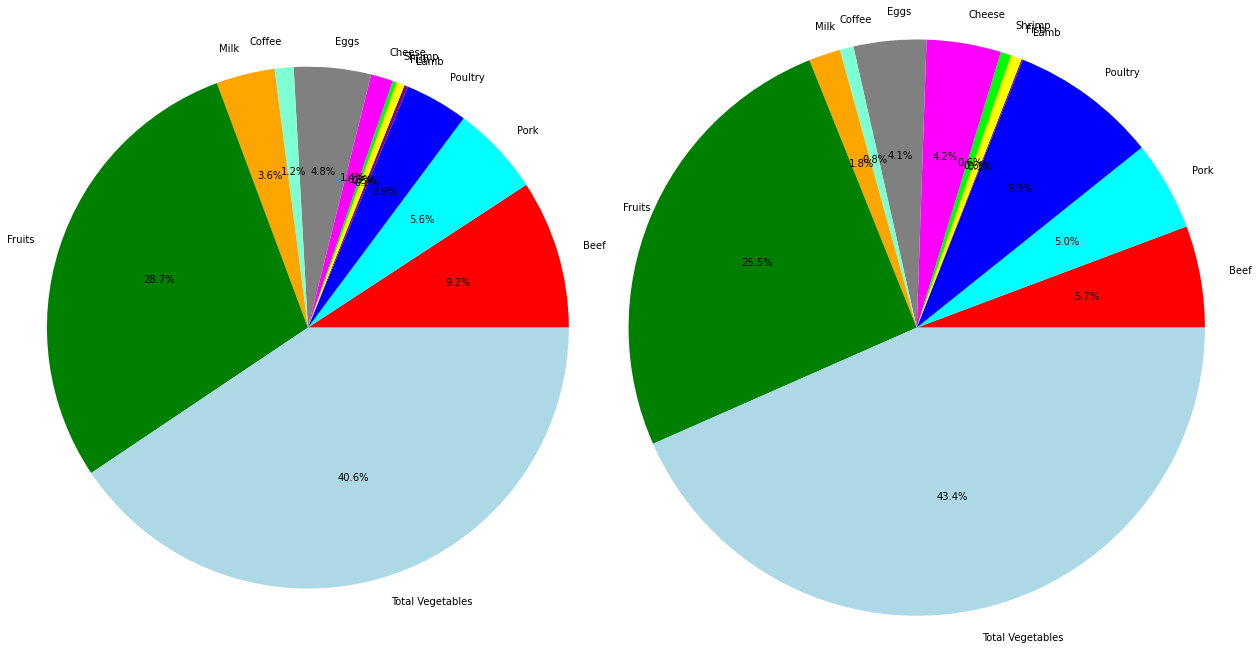

In [5]:
df_pie1970 = df_pie[df_pie['Year'] == 1970]
df_pie2019 = df_pie[df_pie['Year'] == 2019]
sum1970 = sum(df_pie1970['KG'])
sum2019 = sum(df_pie2019['KG'])
rad_2019 = (sum2019 - sum1970) / sum2019
colors = ['#ff0000','#00FFFF','#0000FF','#800080', '#FFFF00', '#00FF00', '#FF00FF', '#808080', '#7FFFD4', '#FFA500', '#008000', '#ADD8E6', ]
pie_1907 = plt.pie(df_pie1970['KG'], colors = colors, labels=df_pie1970['Tab name'], center = (0, 5), autopct='%1.1f%%', radius = 3)
pie_2019 = plt.pie(df_pie2019['KG'], colors = colors, labels=df_pie2019['Tab name'], center = (7, 5), autopct='%1.1f%%', radius = 3 + 3 * rad_2019)
print('The US average diet has changed overtime. Beef consumption has decreased by 3.4% from 1970 to 2019. Vegetable consumption has increased by 3% from 1970 to 2019. At the same time, Cheese consumption has nearly trippled, from 1.49% to 4.2% while Poultry consumption has doubled, from 3.9% to 8.3%.')

Althought there has been a gradual decline in CO2 Emission overtime, there is still much room for 


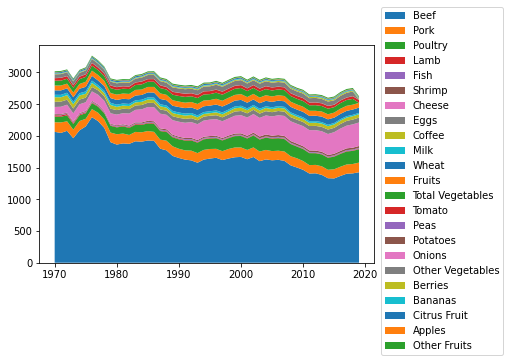

In [6]:
df_AreaSingle = pd.DataFrame()
df_AreaSingle_Test = pd.DataFrame()
df_AreaSingle['Year'] = df_CO2['Year'][0:50]
df_AreaSingle_Test = df_CO2['Tab name'].drop_duplicates()
for i in range(0, len(df_AreaSingle_Test) * 50, 50):
    data_added = df_CO2['CO2 Emission in KG'][0:i+50]
    data_added = data_added.shift(periods = (-1 * i))
    df_AreaSingle[df_AreaSingle_Test[i]] = data_added
    df_AreaSingle.fillna(1, inplace = True)
plt.stackplot(df_AreaSingle['Year'].values, df_AreaSingle.drop('Year',axis=1).T)
plt.legend(df_label, bbox_to_anchor=(1.4, 1.2))
print("Althought there has been a gradual decline in CO2 Emission overtime, there is still much room for ")

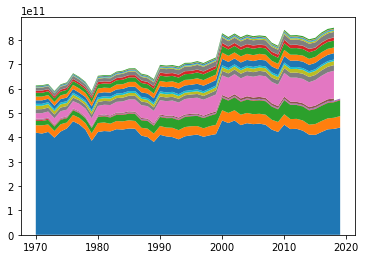

In [7]:
# Total CO2 footprint
df_Area = pd.DataFrame()
df_Area['Year'] = df_CO2['Year'][0:50]
df_Area_Test = df_CO2['Tab name'].drop_duplicates()
for i in range(0, len(df_Area_Test) * 50, 50):
    data_added = df_CO2['Total CO2 Emission'][0:i+50]
    data_added = data_added.shift(periods = (-1 * i))
    df_Area[df_Area_Test[i]] = data_added
    df_Area.fillna(1)
plt.stackplot(df_Area['Year'].values, df_Area.drop('Year',axis=1).T)

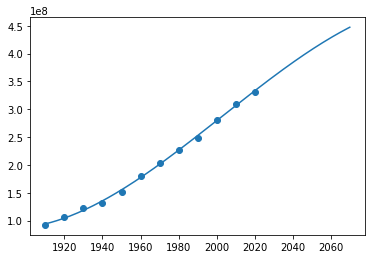

Year: 1910.0 Population: 94104186
Year: 1911.0 Population: 94974311
Year: 1912.0 Population: 95883622
Year: 1913.0 Population: 96831693
Year: 1914.0 Population: 97818100
Year: 1915.0 Population: 98842418
Year: 1916.0 Population: 99904223
Year: 1917.0 Population: 101003090
Year: 1918.0 Population: 102138595
Year: 1919.0 Population: 103310312
Year: 1920.0 Population: 104517818
Year: 1921.0 Population: 105760687
Year: 1922.0 Population: 107038495
Year: 1923.0 Population: 108350818
Year: 1924.0 Population: 109697230
Year: 1925.0 Population: 111077307
Year: 1926.0 Population: 112490624
Year: 1927.0 Population: 113936757
Year: 1928.0 Population: 115415281
Year: 1929.0 Population: 116925772
Year: 1930.0 Population: 118467804
Year: 1931.0 Population: 120040954
Year: 1932.0 Population: 121644796
Year: 1933.0 Population: 123278905
Year: 1934.0 Population: 124942858
Year: 1935.0 Population: 126636230
Year: 1936.0 Population: 128358596
Year: 1937.0 Population: 130109530
Year: 1938.0 Population: 13

In [8]:
# Trend over time (+population + time)
df_pop = pd.read_excel("/content/drive/MyDrive/US_Census.xlsx", sheet_name = "US Population")
df_popX = df_pop['Year']
df_popY = df_pop['Resident Population']
df_popY = df_popY.dropna()
df_popX = df_popX.dropna()
df_popgraph = numpy.poly1d(numpy.polyfit(df_popX, df_popY,3))

df_popline = numpy.linspace(1910, 2070, 161)
plt.scatter(df_popX, df_popY)
plt.plot(df_popline, df_popgraph(df_popline))
plt.show()
df_show = df_popgraph(df_popline)
for i in range(0, len(df_show)):
  print("Year:", df_popline[i], "Population:", round(df_show[i]))

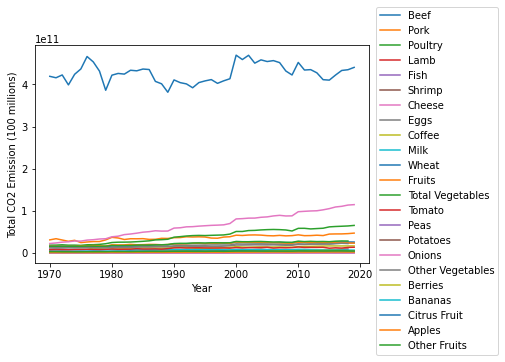

In [9]:
# Trend over time (+population + time + dietary change overtime)
df_CO2['Population'].dropna()
plt.xlabel('Year')
plt.ylabel('Total CO2 Emission (100 millions)')
df_label = df_CO2['Tab name'].drop_duplicates()
for i in range(0, len(df_CO2['Year']), 50):
    plt.plot(df_CO2['Year'][i:i+50], df_CO2['Total CO2 Emission'][i:i+50])
    # plt.plot(df_CO2['Year'][i:i+50], numpy.log(df_CO2['Total CO2 Emission'][i:i+50]))
    plt.legend(df_label, bbox_to_anchor=(1.4, 1.2))
plt.show()